# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [3]:
def GUC_Distance ( Cluster_Centroids, Data_point, Distance_Type ):
    Cluster_Distance=0
    if( Distance_Type == "ED"):
        Cluster_Distance=np.linalg.norm(Data_point-Cluster_Centroids)
    else:
        Cluster_Distance=np.corrcoef(Data_point-Cluster_Centroids)
    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [27]:
def getMembership(centroids,image,Distance_Type):
    membership=0
    minDistance=GUC_Distance(centroids[0],image,Distance_Type)
    for i in range(1,len(centroids)):
        distance=GUC_Distance(centroids[i],image,Distance_Type)
        if(distance<minDistance):
            minDistance=distance
            membership=i
    return membership

In [28]:
def randomizeCentroids(Data_points,Number_of_Clusters):
    Final_Cluster_Distance=np.zeros((Number_of_Clusters,len(Data_points[0])))
    for i in range(0,Number_of_Clusters):
        Final_Cluster_Distance[i]=Data_points[i]
    return Final_Cluster_Distance
        
    

In [34]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here
    Final_Cluster_Distance = randomizeCentroids(Data_points,Number_of_Clusters)
    Cluster_Metric=np.zeros(len(Data_points))

    memberships=np.zeros(len(Data_points),dtype=int)
    for i in range(len(Data_points)):
        memberships[i]=int(getMembership(Final_Cluster_Distance,Data_points[i],Distance_Type))
    oldcentroids=np.zeros(Final_Cluster_Distance.shape)
    while(not(np.array_equal(oldcentroids,Final_Cluster_Distance))):
        oldcentroids=np.array(Final_Cluster_Distance, copy=True)
        for i in range(len(Final_Cluster_Distance)):
            elements=(np.where(memberships==i))[0]
            Final_Cluster_Distance[i]=np.mean(Data_points[elements],axis=0)
            Cluster_Metric[i] = np.linalg.norm(Data_points[elements]-Final_Cluster_Distance[i])
        for i in range(len(Data_points)):
            memberships[i]=int(getMembership(Final_Cluster_Distance,Data_points[i],Distance_Type))
            Cluster_Metric[i] = np.linalg.norm(Data_points[i]-Final_Cluster_Distance[memberships[i]])

    
    
    return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [7]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [51]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        target =(len(X[0])-1)
        for i in range(len(X[0])-1):
            plt.scatter(X[:,i],X[:,target],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            target=(len(X[0])-1)
            for k in range(len(X[0])-2):
                plt.scatter(X[X[:,0]==i,k+1],X[X[:,0]==i,target],c = color[i],alpha = alpha,s=s)
                plt.scatter(km[i][k],km[i][target-1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

0
1
2


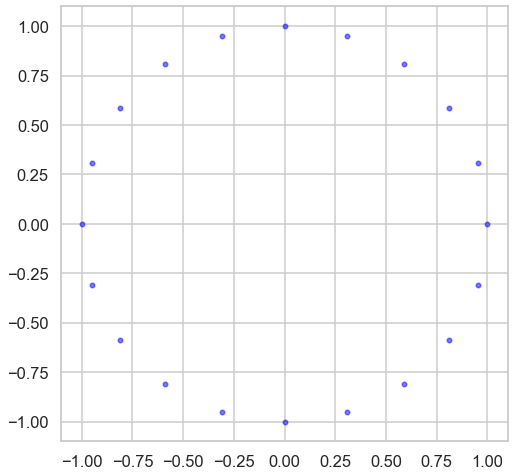

In [46]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

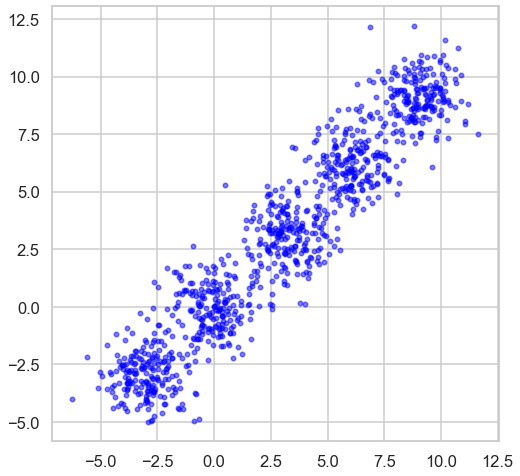

In [48]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y2 = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

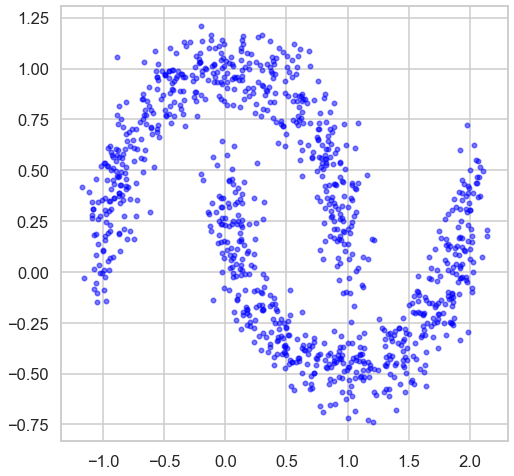

In [49]:
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [55]:
#Example 1
from sklearn.cluster import KMeans
clusters=range(2,11)
for i in range(2,11):
    print ("Example1, number of clusters =",i)
    [ Final_Cluster_Distance , Cluster_Metric ]= GUC_Kmean( X1, i, "ED" )
    
plt.show
for i in range(2,11):
    print ("Example2, number of clusters =",i)
    [ Final_Cluster_Distance , Cluster_Metric ]= GUC_Kmean( X2, i, "ED" )
#Example 3

for i in range(2,11):
    print ("Example3, number of clusters =",i)
    [ Final_Cluster_Distance , Cluster_Metric ]= GUC_Kmean( X3, i, "ED" )
    
    

Example1, number of clusters = 2
2
Example1, number of clusters = 3
2
Example1, number of clusters = 4
2
Example1, number of clusters = 5
2
Example1, number of clusters = 6
2
Example1, number of clusters = 7
2
Example1, number of clusters = 8
2
Example1, number of clusters = 9
2
Example1, number of clusters = 10
2
Example2, number of clusters = 2
2
Example2, number of clusters = 3
2
Example2, number of clusters = 4
2
Example2, number of clusters = 5
2
Example2, number of clusters = 6
2
Example2, number of clusters = 7
2
Example2, number of clusters = 8
2
Example2, number of clusters = 9
2
Example2, number of clusters = 10
2
Example3, number of clusters = 2
2
Example3, number of clusters = 3
2
Example3, number of clusters = 4
2
Example3, number of clusters = 5
2
Example3, number of clusters = 6
2
Example3, number of clusters = 7
2
Example3, number of clusters = 8
2
Example3, number of clusters = 9
2
Example3, number of clusters = 10
2


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [35]:
import sys
df = pd.read_csv('Customer data.csv')
#Dropping Serial Number
customer_data = df.values[:,1:]
#Using Euclidean Distance
min_distorion=sys.maxsize
min_distorion_k = 1

for i in range(2,11):
    print ("Customer data, number of clusters =",i)
    [ Final_Cluster_Distance , Cluster_Metric ]= GUC_Kmean( customer_data, i, "ED" )
    distorion = np.mean(Cluster_Metric,axis=0)
    if(distorion<min_distorion):
        min_distorion=distorion
        min_distorion_k=i
#Using Pearson correlation distance
min_distorion=sys.maxsize
min_distorion_k = 1
for i in range(2,11):
    print ("Customer data, number of clusters =",i)
    [ Final_Cluster_Distance , Cluster_Metric ]= GUC_Kmean( customer_data, i, "PC" )
    if(distorion<min_distorion):
        min_distorion=distorion
        min_distorion_k=i

   


Customer data, number of clusters = 2
7
(2000,)
18790.763880894818
Customer data, number of clusters = 3
7
(2000,)
14332.151364955567
Customer data, number of clusters = 4
7
(2000,)
10875.52967253045
Customer data, number of clusters = 5
7
(2000,)
8670.9792860022
Customer data, number of clusters = 6
7
(2000,)
7445.393390794125
Customer data, number of clusters = 7
7
(2000,)
6593.266012530631
Customer data, number of clusters = 8
7
(2000,)
5560.31635942583
Customer data, number of clusters = 9
7
(2000,)
5053.640754973288
Customer data, number of clusters = 10
7
(2000,)
4605.141661603765
Customer data, number of clusters = 2
7


KeyboardInterrupt: 